4431872/4422102 [==============================] - 0s 0us/step


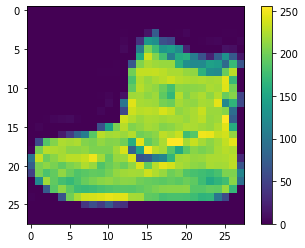

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()  
plt.grid(False)
plt.show()  

패션 Mnist는 비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 한다. 코드를 테스트하고 디버깅하는 용도로 좋다.

여기에서 60000개의 이미지를 사용하여 네트워크를 훈련하고 10000개의 이미지를 사용하여 네트워크에서 이미지 분류를 학습한 정도를 평가한다. TensorFloow에서 직접 Fashion MNIST에 액세스 할수 있다. 

In [2]:
train_images = train_images / 255.0
test_images = test_images / 255.0 

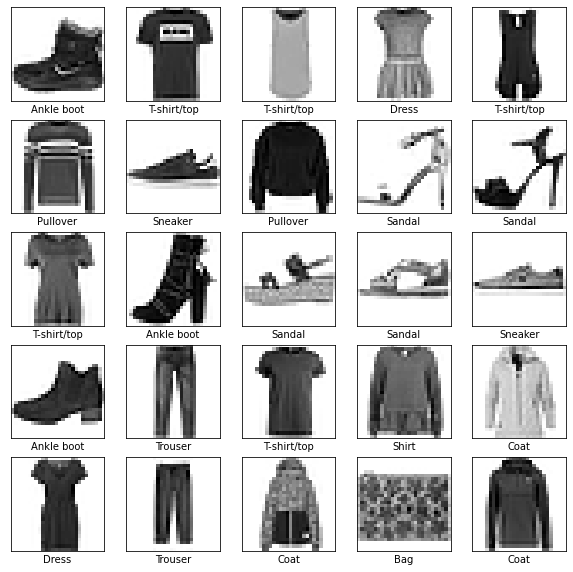

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성
신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일한다. 

# 층설정 
신경망의 기본 빌딩 블록은 레이어이다. 레이어는 레이어에 공급된 데이터로부터 표현을 추출한다. 

대부분의 딥러닝은 간단한 층을 연결하여 구성된다. tf.keras.layers.Dense 와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습된다. 


In [4]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)
])

이 네트워크의 첫 번째 층인 tf.keras.layers.Flatten 은 2차원 배열(28*28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환한다. 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘린다. 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 한다. 

픽셀을 펼친 후에는 두 개의 tf.keras.layers.Dense 층이 연속되어 연결된다. 이 층을 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 부른다. 첫 번째 Dense 층은 128 개의 노드(또는 뉴런)를 가진다. 두번째(마지막) 층은 10개의 노드의 소프트맥스(softmax) 층이다. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1이다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력한다. 

# 모델 컴파일
모델을 훈련할 준비가 되기 전에 몇가지 설정이 더 필요하다. 
* 손실 함수 - 훈련 중 모델이 얼마나 정확한지 측정한다. 모델을 올바른 방향으로 조정하려면 이 함수를 최소화해야 한다. 
* 옵티마이저 - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식이다.
* 메트릭 - 훈련 및 테스트 단계를 모니터링하는 데 사용된다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용한다. 

In [5]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 훈련
신경망 모델을 훈련하려면 다음 단계가 필요하다. 
1. 훈련 데이터를 모델에 주입한다. - 이 예에서는 train_images와 train_labels 배열이다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배운다. 
3. 테스트 세트에 대한 모델의 예측을 만든다. - 이 예에서는 test_images 배열이다. 이 예측이 test_labels 배열의 레이블과 맞는지 확인한다. 
4. 예측이 test_labels 배열의 레이블과 일치하는지 확인한다. 

# 모델 피드
훈련을 시작하려면 model.fit 메서드를 호출한다. 모델을 훈련 데이터에 '맞추기(fit)' 때문에 이렇게 불린다. 

In [6]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4944 - accuracy: 0.8268
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3739 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3334 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3082 - accuracy: 0.8873
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2932 - accuracy: 0.8937
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2798 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2657 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2570 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2451 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

# 정확도 평가
다음으로, 모델이 테스트 데이터세트에서 작동하는 방식을 비교한다. 

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3325 - accuracy: 0.8838 - 778ms/epoch - 2ms/step

Test accuracy: 0.8838000297546387


테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮다. 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문이다. 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말한다.

# 예측하기
훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있다. 모델의 선형 출력, 로직, 소프트맥스 레이어를 연결하여 로직을 해석하기 쉬운 확률로 변환한다. 

In [8]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [9]:
predictions[0]

array([2.3020200e-06, 1.5925533e-08, 5.4541266e-07, 3.0459761e-09,
       2.4209902e-07, 1.1121798e-03, 7.3591644e-07, 7.0782498e-02,
       5.6275137e-08, 9.2810136e-01], dtype=float32)

In [10]:
np.argmax(predictions[0])

9

In [11]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## 예측확인
훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있다. 
0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인해 보자. 

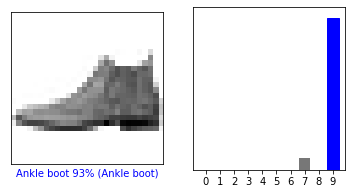

In [12]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

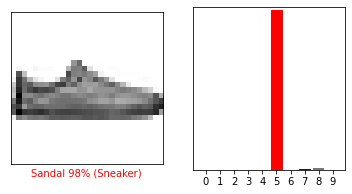

In [13]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

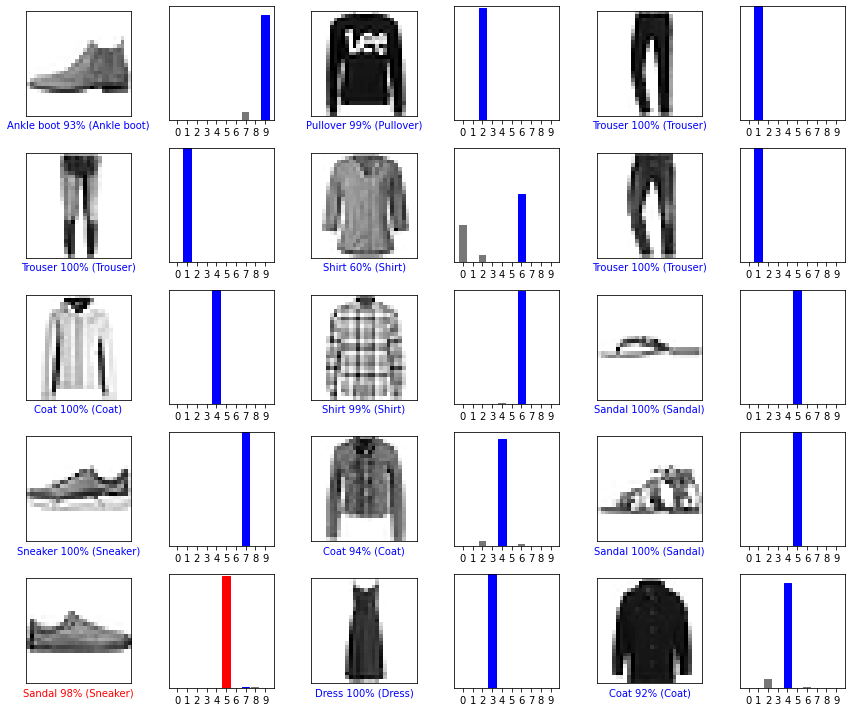

In [14]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 훈련된 모델 사용하기
마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만든다. 

In [15]:
img = test_images[1]
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [16]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[2.6982016e-04 8.9764833e-15 9.9000376e-01 1.4498824e-11 4.1923453e-03
  2.6897571e-13 5.5340650e-03 2.3161774e-14 3.5145413e-09 2.6984264e-09]]


plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

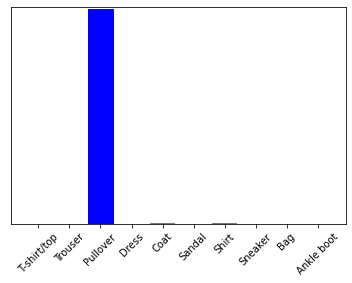

In [17]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [18]:
np.argmax(predictions_single[0])

2

[참고코드](https://www.tensorflow.org/tutorials/keras/classification?hl=ko#%ED%9B%88%EB%A0%A8%EB%90%9C_%EB%AA%A8%EB%8D%B8_%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0)